In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
!unzip data.zip

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [29]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [ ]:
X, y = next(train_ds)

In [6]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 918 images belonging to 2 classes.


In [7]:
conv_layer = tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3))
model = tf.keras.models.Sequential([        
        conv_layer,
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(input_shape=(150, 150)),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ]) 

In [8]:
optimizer =  keras.optimizers.SGD(lr=0.002, momentum=0.8)
model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy']) 
        

In [33]:
c_params = conv_layer.count_params()
c_params

896

In [ ]:
total_params = model.count_params()

In [ ]:
total_params

In [9]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
184/184 [==============================] - 7s 39ms/step - loss: 0.6540 - accuracy: 0.6114 - val_loss: 0.5602 - val_accuracy: 0.7320
Epoch 2/10
184/184 [==============================] - 7s 37ms/step - loss: 0.5695 - accuracy: 0.7079 - val_loss: 0.5459 - val_accuracy: 0.7222
Epoch 3/10
184/184 [==============================] - 7s 37ms/step - loss: 0.5394 - accuracy: 0.7370 - val_loss: 0.5462 - val_accuracy: 0.7407
Epoch 4/10
184/184 [==============================] - 7s 38ms/step - loss: 0.4853 - accuracy: 0.7729 - val_loss: 0.5767 - val_accuracy: 0.7320
Epoch 5/10
184/184 [==============================] - 7s 37ms/step - loss: 0.4338 - accuracy: 0.8126 - val_loss: 0.5318 - val_accuracy: 0.7614
Epoch 6/10
184/184 [==============================] - 7s 38ms/step - loss: 0.3380 - accuracy: 0.8610 - val_loss: 0.5962 - val_accuracy: 0.7353
Epoch 7/10
184/184 [==============================] - 7s 37ms/step - loss: 0.2445 - accuracy: 0.9081 - val_loss: 0.6425 - val_accuracy: 0.7603

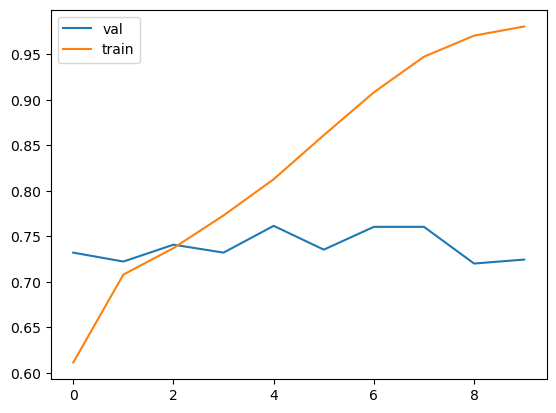

In [10]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [11]:
accuracies = history.history['accuracy']

# Calculate the median
import numpy as np
median_accuracy = np.median(accuracies)

print(f"Median training accuracy over 10 epochs is: {median_accuracy}")

Median training accuracy over 10 epochs is: 0.8368234932422638


In [12]:
 history.history['loss']

[0.6540006995201111,
 0.5695369839668274,
 0.5393515229225159,
 0.4852580428123474,
 0.4338098168373108,
 0.33797580003738403,
 0.24451996386051178,
 0.1585528552532196,
 0.1077343299984932,
 0.07700322568416595]

In [13]:
num_epochs = 10
losses = history.history['loss']

# Calculate the standard deviation
std_deviation_loss = np.std(losses)

print(f"Standard deviation of training loss over {num_epochs} epochs is: {std_deviation_loss}")

Standard deviation of training loss over 10 epochs is: 0.19538868879940743


In [14]:
train_gen_a = ImageDataGenerator(rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

train_ds_a = val_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)
   

Found 918 images belonging to 2 classes.


In [15]:
val_gen_a = ImageDataGenerator(rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

val_ds_a = val_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 918 images belonging to 2 classes.


In [16]:
history = model.fit(train_ds_a, epochs=10, validation_data=val_ds_a)

Epoch 1/10
46/46 [==============================] - 2s 48ms/step - loss: 0.6333 - accuracy: 0.7081 - val_loss: 0.4096 - val_accuracy: 0.8508
Epoch 2/10
46/46 [==============================] - 2s 48ms/step - loss: 0.3641 - accuracy: 0.8529 - val_loss: 0.2360 - val_accuracy: 0.9303
Epoch 3/10
46/46 [==============================] - 2s 46ms/step - loss: 0.2671 - accuracy: 0.9052 - val_loss: 0.1443 - val_accuracy: 0.9782
Epoch 4/10
46/46 [==============================] - 2s 47ms/step - loss: 0.1388 - accuracy: 0.9706 - val_loss: 0.0950 - val_accuracy: 0.9858
Epoch 5/10
46/46 [==============================] - 2s 46ms/step - loss: 0.0706 - accuracy: 0.9847 - val_loss: 0.0429 - val_accuracy: 0.9956
Epoch 6/10
46/46 [==============================] - 2s 48ms/step - loss: 0.0384 - accuracy: 0.9946 - val_loss: 0.0207 - val_accuracy: 0.9989
Epoch 7/10
46/46 [==============================] - 2s 49ms/step - loss: 0.0205 - accuracy: 0.9989 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 8/10
46

In [17]:
accuracies = history.history['val_accuracy']
losses =  history.history['val_loss']
# Calculate the median
median_accuracy = np.median(accuracies)
median_loss = np.median(losses)

print(f"Median  accuracy over 10 epochs is: {median_accuracy}")
print(f"Median validation loss over 10 epochs is: {median_loss}")

Median  accuracy over 10 epochs is: 0.9972766935825348
Median validation loss over 10 epochs is: 0.03178269509226084
